In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform,binom,norm,chi2_contingency

In [ ]:
df=pd.read_csv('walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Data types of the variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# Shape of the dataset

In [ ]:
df.shape
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 10
Number of rows: 550068


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df['Product_Category'].nunique()

20

In [ ]:
df['Stay_In_Current_City_Years'].nunique()

5

# Detecting the outliers for numerical variables

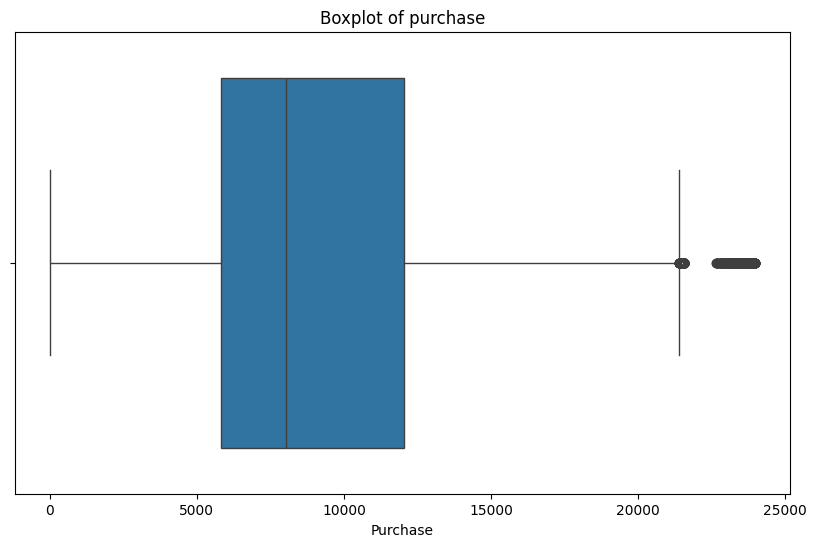

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Purchase')
plt.title('Boxplot of purchase')
plt.show()

In [ ]:
Q1=np.quantile(df['Purchase'],q=0.25)
Q3=np.quantile(df['Purchase'],q=0.75)
print(f'Quanile 1: {Q1}')
print(f'Quanile 3: {Q3}')


Quanile 1: 5823.0
Quanile 3: 12054.0


In [ ]:
IQR=Q3-Q1
min_thresold=max(Q1-1.5*IQR,np.min(df['Purchase']))
print(min_thresold)

12


In [ ]:
max_thresold=min(Q3+1.5*IQR,np.max(df['Purchase']))
print(max_thresold)

21400.5


#Removing the outliers

In [ ]:
df_outliers=df[(df['Purchase']>max_thresold) |( df['Purchase']<min_thresold)]
df_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
df_cleaned=df[(df['Purchase']<=max_thresold) & ( df['Purchase']>=min_thresold)]

In [ ]:
df_cleaned.shape

(547391, 10)

In [ ]:
fifth_percentile=np.percentile(df['Purchase'],q=5)
ninty_5_percentile=np.percentile(df['Purchase'],q=95)

print(fifth_percentile,ninty_5_percentile)

1984.0 19336.0


In [ ]:
df['Purchase_clipped']=np.clip(df['Purchase'],fifth_percentile,ninty_5_percentile)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_clipped
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,1984
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,1984
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,1984
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,1984


# Data Exploration

In [ ]:
# Filter relevant columns
data_subset = df[['Age', 'Product_Category','Product_ID']]

# Group by Age and ProductCategory, count occurrences of each Product_ID
grouped_data = data_subset.groupby(['Age', 'Product_Category'])['Product_ID'].count().reset_index()
grouped_data

,Age,Product_Category,Product_ID
0,0-17,1,3585
1,0-17,2,805
2,0-17,3,1200
3,0-17,4,758
4,0-17,5,4330
...,...,...,...
135,55+,16,377
136,55+,17,67
137,55+,18,241
138,55+,19,103


<Axes: xlabel='Age', ylabel='Product_Category'>

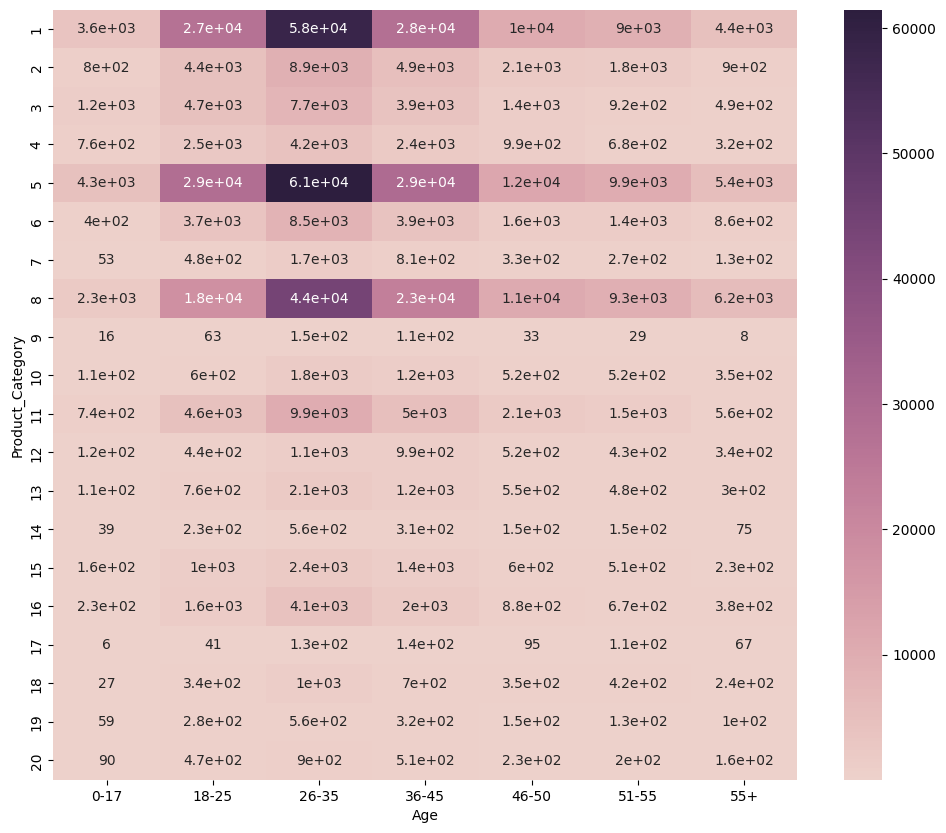

In [ ]:
Contingency_tab=pd.crosstab(columns=df['Age'],index=df['Product_Category'])
plt.figure(figsize=(12,10))
sns.heatmap(Contingency_tab,cmap=sns.cubehelix_palette(as_cmap=True),annot=True)



1.   For all age group the most purchased product categories are 5,1 and 8.
2.   For age group 26-35 and 36-45 there are few more significant product categories: 2,3,6 & 11.



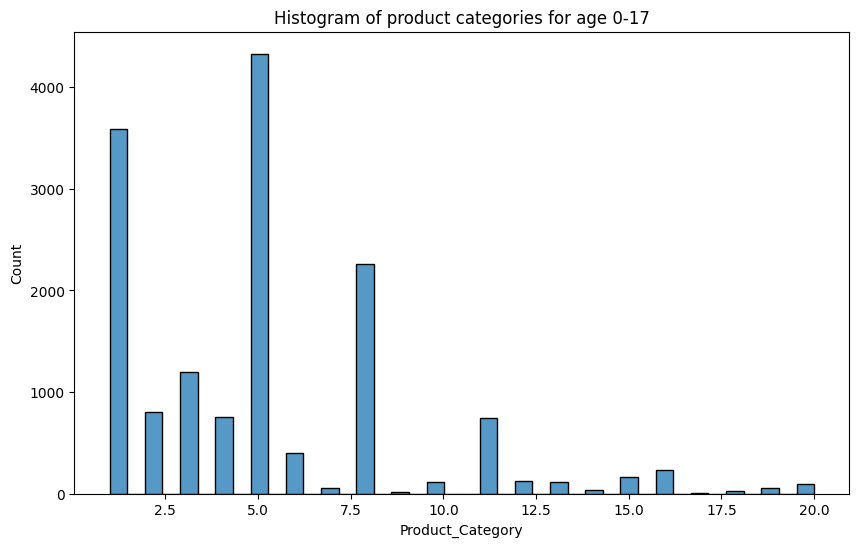

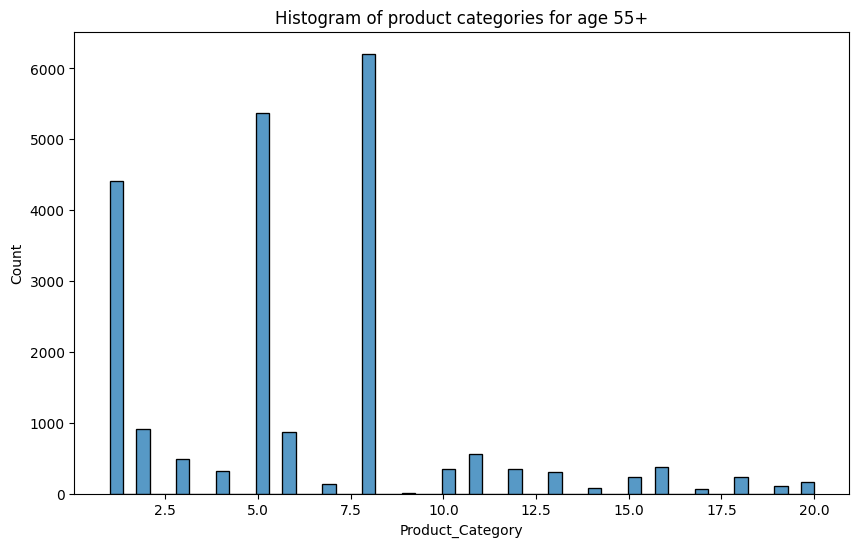

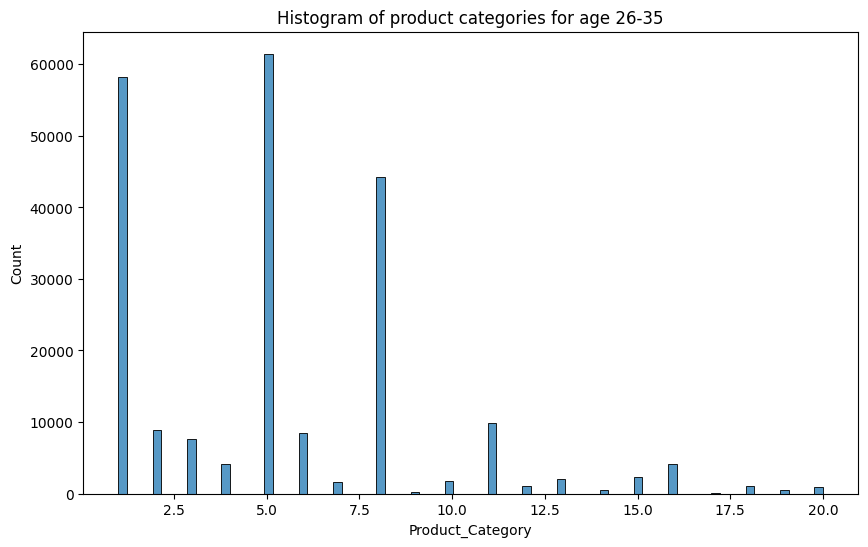

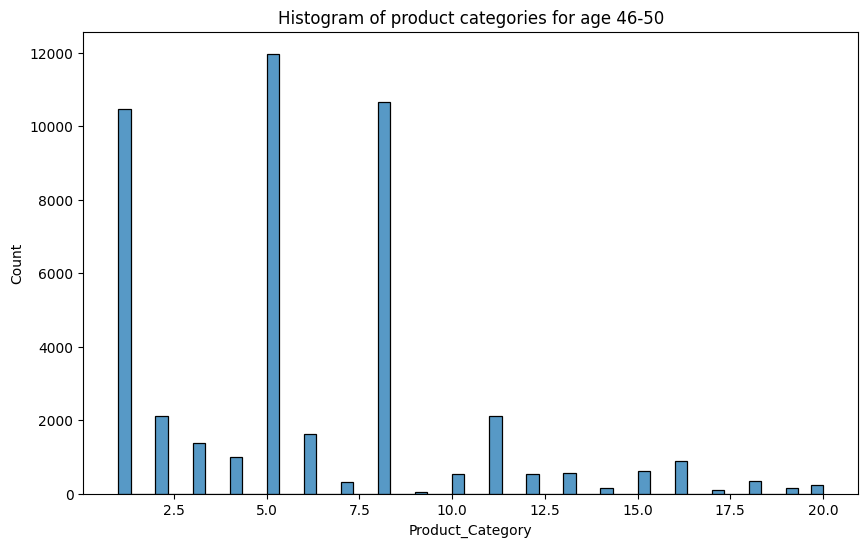

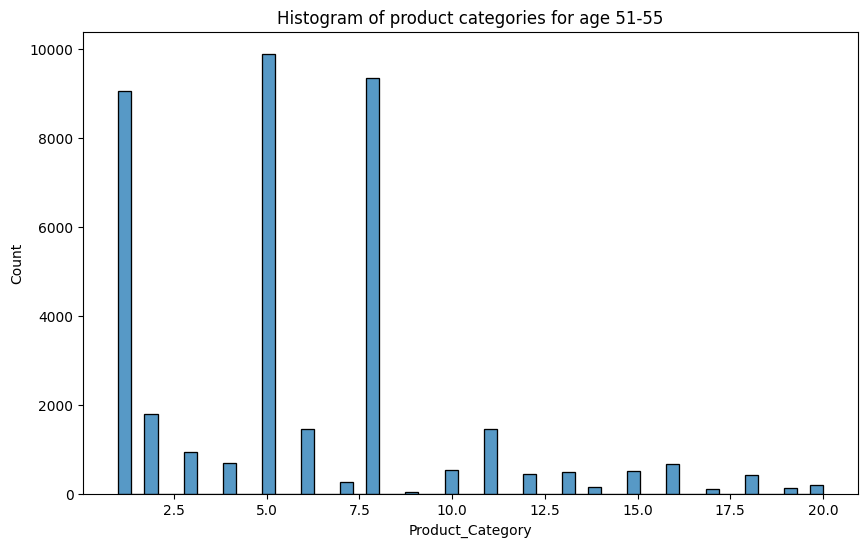

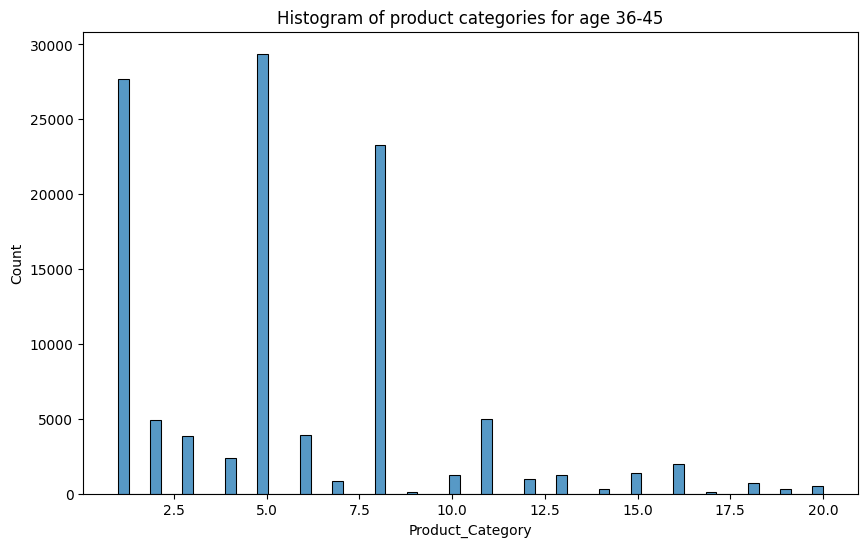

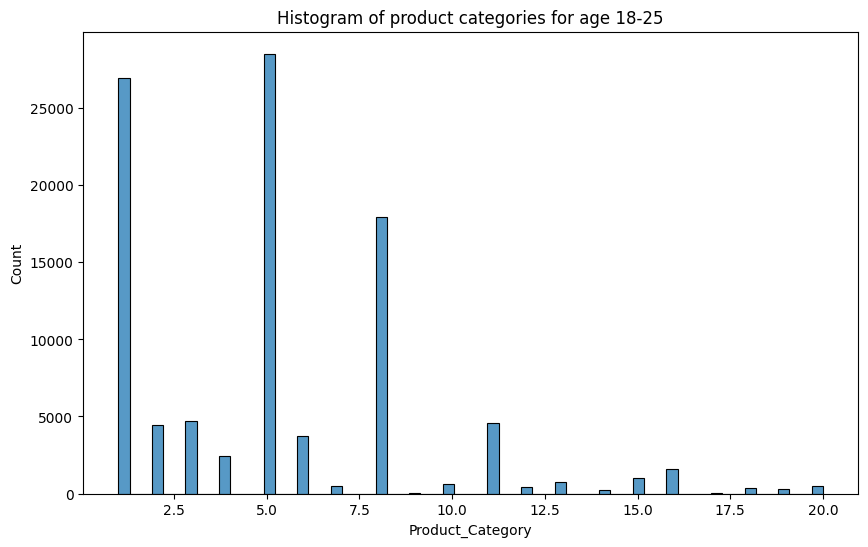

In [ ]:
for i in df['Age'].unique():
  plt.figure(figsize=(10,6))
  sns.histplot(data=df[df['Age']==i],x='Product_Category')
  plt.title(f'Histogram of product categories for age {i}')
plt.show()

# Chi Squared test of Independence

*   H0: Product Categories and Age group are independent of each other.
*   H1: They are not independent.



In [ ]:
chi2_contingency(pd.crosstab(df['Product_Category'],df['Age']))

Chi2ContingencyResult(statistic=7637.286550357664, pvalue=0.0, dof=114, expected_freq=array([[3.85404815e+03, 2.54333491e+04, 5.60388604e+04, 2.80754469e+04,
        1.16629489e+04, 9.82550044e+03, 5.48784607e+03],
       [6.55181047e+02, 4.32362224e+03, 9.52650248e+03, 4.77277397e+03,
        1.98267971e+03, 1.67031688e+03, 9.32923668e+02],
       [5.54943618e+02, 3.66214283e+03, 8.06902425e+03, 4.04257795e+03,
        1.67934567e+03, 1.41477183e+03, 7.90193852e+02],
       [3.22676116e+02, 2.12938033e+03, 4.69179449e+03, 2.35058718e+03,
        9.76468097e+02, 8.22629662e+02, 4.59464124e+02],
       [4.14383343e+03, 2.73456787e+04, 6.02524136e+04, 3.01864354e+04,
        1.25398842e+04, 1.05642783e+04, 5.90047636e+03],
       [5.61889679e+02, 3.70798076e+03, 8.17002178e+03, 4.09317768e+03,
        1.70036553e+03, 1.43248010e+03, 8.00084470e+02],
       [1.02159264e+02, 6.74161849e+02, 1.48542222e+03, 7.44195941e+02,
        3.09149816e+02, 2.60444565e+02, 1.45466350e+02],
       [3.1

# Preferred product categories for different genders

Text(0.5, 1.0, 'Histogram of product categories for different gender')

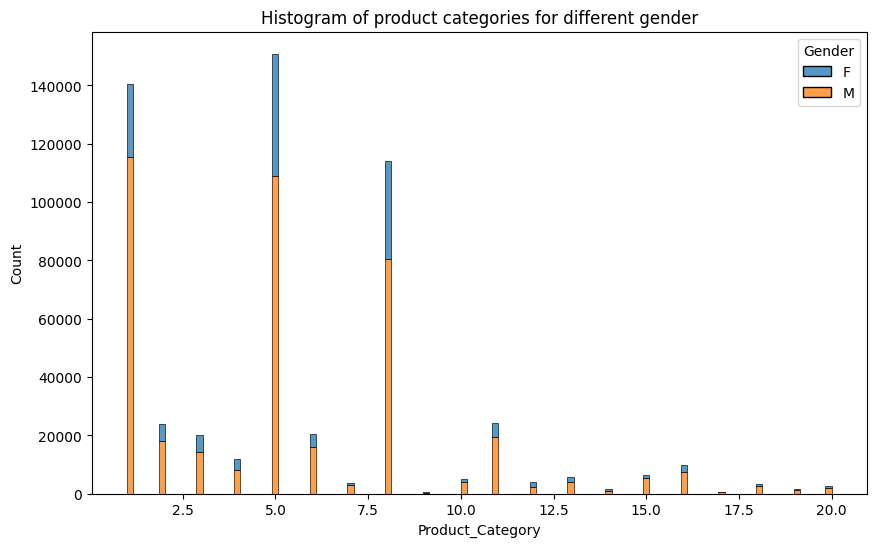

In [ ]:
  plt.figure(figsize=(10,6))
  sns.histplot(data=df,x='Product_Category',hue='Gender',multiple='stack')
  plt.title('Histogram of product categories for different gender')

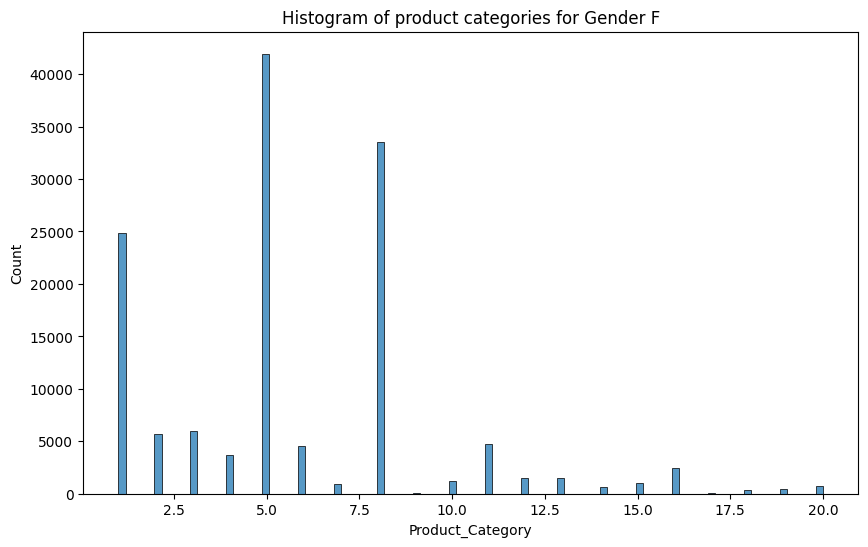

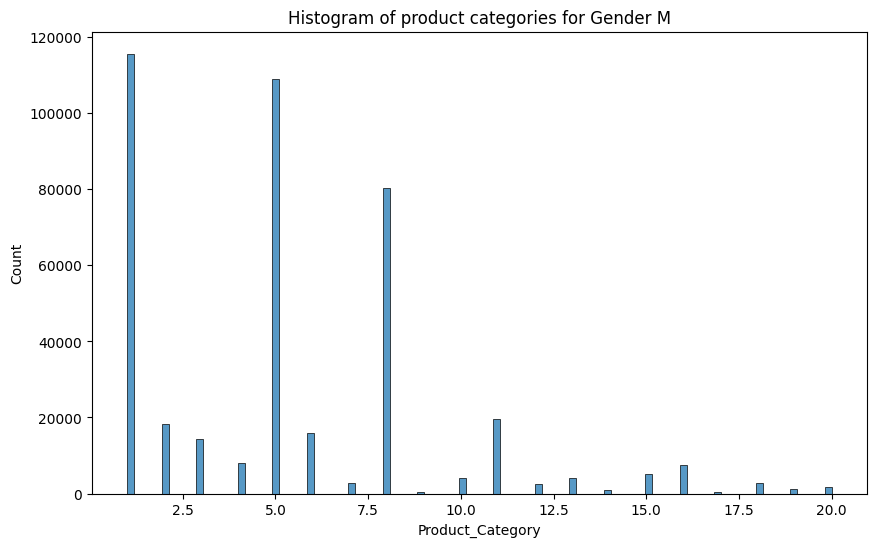

In [ ]:
for i in df['Gender'].unique():
  plt.figure(figsize=(10,6))
  sns.histplot(data=df[df['Gender']==i],x='Product_Category')
  plt.title(f'Histogram of product categories for Gender {i}')
plt.show()

# Chi Squared test of Independence



*   H0: Product Categories and Gender are independent of each other.
*   H1: They are not independent.



In [ ]:
chi2_contingency(pd.crosstab(df['Product_Category'],df['Gender']))

Chi2ContingencyResult(statistic=8070.411022236562, pvalue=0.0, dof=19, expected_freq=array([[3.46586164e+04, 1.05719384e+05],
       [5.89190059e+03, 1.79720994e+04],
       [4.99048721e+03, 1.52225128e+04],
       [2.90175610e+03, 8.85124390e+03],
       [3.72645924e+04, 1.13668408e+05],
       [5.05295162e+03, 1.54130484e+04],
       [9.18696032e+02, 2.80230397e+03],
       [2.81275048e+04, 8.57974952e+04],
       [1.01226921e+02, 3.08773079e+02],
       [1.26533651e+03, 3.85966349e+03],
       [5.99633715e+03, 1.82906629e+04],
       [9.74494286e+02, 2.97250571e+03],
       [1.37001996e+03, 4.17898004e+03],
       [3.76020977e+02, 1.14697902e+03],
       [1.55296911e+03, 4.73703089e+03],
       [2.42648337e+03, 7.40151663e+03],
       [1.42705269e+02, 4.35294731e+02],
       [7.71546654e+02, 2.35345335e+03],
       [3.95772572e+02, 1.20722743e+03],
       [6.29582070e+02, 1.92041793e+03]]))



*   Result: We can say that Product category and gender are statistically associated.




# Is there a relationship between age, marital status, and the amount spent?

To test: Age and marital status is impacting amount purchased or not?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
test=ols('Purchase_clipped ~ C(Age)*C(Marital_Status)',data=df).fit()
sm.stats.anova_lm(test,typ=2)

,sum_sq,df,F,PR(>F)
C(Age),5.594562e+09,6.0,3.956905e+01,2.051804e-48
C(Marital_Status),-2.248602e-04,1.0,-9.542304e-12,1.000000e+00
C(Age):C(Marital_Status),3.306243e+09,6.0,2.338429e+01,8.711628e-28
Residual,1.296180e+13,550055.0,NaN,NaN


# Inferences: (assume alpha=0.05)

1.   The avg purchase amount across various Age groups are different.
2.   The avg purchase amount across various Marital status is same.


3. Interaction effect:  The avg purchase amount across various Age and marital status groups are different.






# Analysis of correlation between diff. variables

<ipython-input-122-b8389f12d4e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


<Axes: >

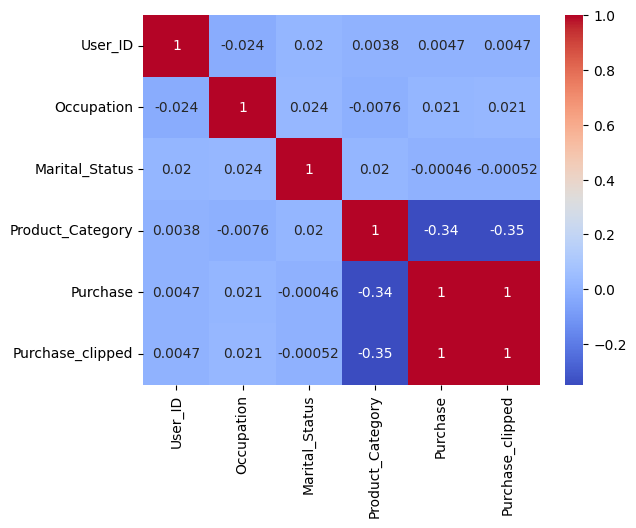

In [ ]:
corr_mat=df.corr()
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)

# How does gender affect the amount spent?

In [ ]:
male_amt_purchase=df[df['Gender']=='M']['Purchase_clipped']
female_amt_purchase=df[df['Gender']=='F']['Purchase_clipped']


In [ ]:
male_amt_purchase.mean()


9427.240996574606

In [ ]:
female_amt_purchase.mean()

8736.540266109021

# Testing the hypothesis
H0: Avg. purchase amount of males and females are same.




H1: Avg. purchase amount of males are significantly higher than females.

In [ ]:
from statsmodels.stats import weightstats as stests
stests.ztest(male_amt_purchase,female_amt_purchase,alternative='larger')


(45.574933432542736, 0.0)


*   Conclusion: Average pucrchase amt. of males are actually greater than
that of females.

# Computing the Confidence Intervals

# Sample size: 300 [Age vs Gender]

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=300).mean() for i in range (1000)])


In [ ]:
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=300).mean()for i in range(1000)])


In [ ]:
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means

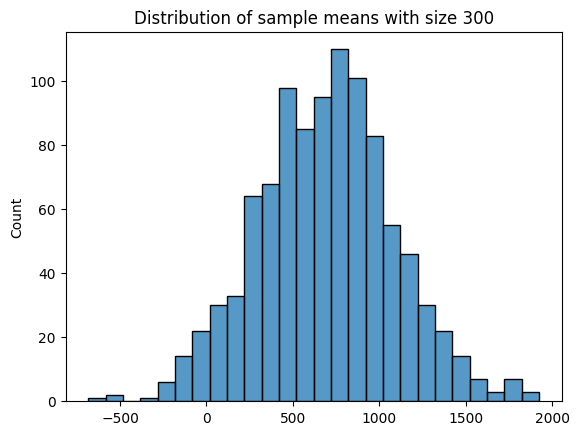

In [ ]:
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size 300')
plt.show()

In [ ]:
alpha=0.05
lower_percentile=(alpha/2)
upper_percentile=1-lower_percentile

In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for Sample size 300: [{lower_bound},{upper_bound}]')

Confidence interval for Sample size 300: [-74.65816666666669,1487.525499999999]


#Sample size 3000

Text(0.5, 1.0, 'Distribution of sample means with size 3000')

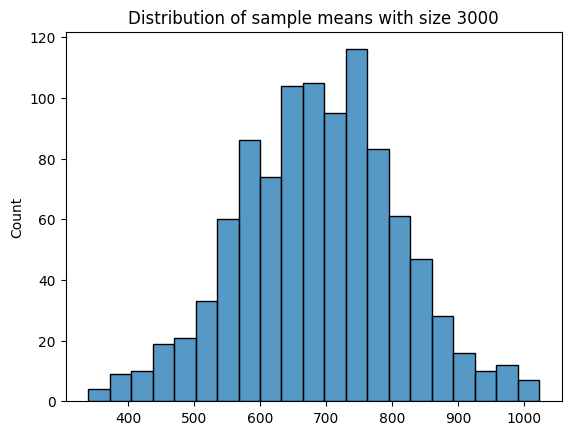

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=3000).mean() for i in range (1000)])
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=3000).mean()for i in range(1000)])
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size 3000')


In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for Sample size 3000: [{lower_bound},{upper_bound}]')

Confidence interval for Sample size 3000: [440.41248333333317,935.4415833333326]


# Sample size 30000

Text(0.5, 1.0, 'Distribution of sample means with size 30000')

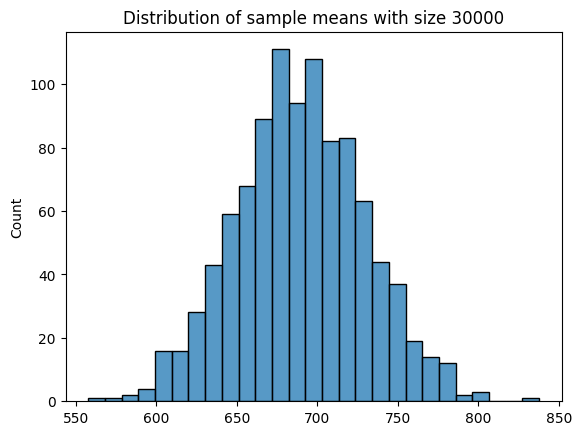

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=30000).mean() for i in range (1000)])
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=30000).mean()for i in range(1000)])
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size 30000')


In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for Sample size 30000: [{lower_bound},{upper_bound}]')

Confidence interval for Sample size 30000: [611.0404066666667,768.1700741666666]


#Sampling for the whole population

Text(0.5, 1.0, 'Distribution of sample means with size of population')

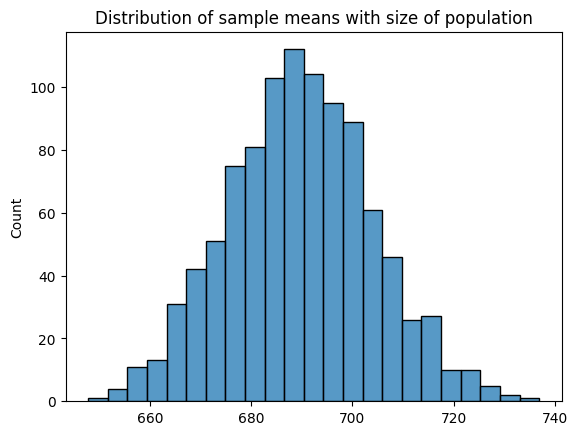

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=male_amt_purchase.shape[0]).mean() for i in range (1000)])
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=female_amt_purchase.shape[0]).mean()for i in range(1000)])
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size of population')

In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the whole data: [{lower_bound},{upper_bound}]')

Confidence interval for the whole data: [661.8765451970897,718.5015237454361]


In [ ]:
lower_bound_male=np.percentile(bootstrapped_sample_male_means,lower_percentile*100)
upper_bound_male=np.percentile(bootstrapped_sample_male_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the whole male data: [{lower_bound_male},{upper_bound_male}] and the spread is {upper_bound_male-lower_bound_male}' )

Confidence interval for the whole male data: [9411.569456970155,9442.532251260685] and the spread is 30.962794290529928


In [ ]:
lower_bound_female=np.percentile(bootstrapped_sample_female_means,lower_percentile*100)
upper_bound_female=np.percentile(bootstrapped_sample_female_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the whole female data: [{lower_bound_female},{upper_bound_female}] and the spread is {upper_bound_female-lower_bound_female}' )

Confidence interval for the whole female data: [8712.607176807134,8761.66224753146] and the spread is 49.05507072432556


# The confidence intervals of males and females do not overlap.

# Findings

*  The confidence interval computed using the entire dataset wider for females compared to males. It's because the variation or the std. deviation in the purchase amount of female is higher.


*   Width of the cofidence interval decreases as sample size increases, which is consistent with CLT.
*   Confidence Interval with higher sample sizes will lie within the confidence Interval with smaller sample sizes.

*   As sample size increases the sampling distribution of sample means become more normally disributed with lesser spread and higher precision.










# How does Marital_Status affect the amount spent?

In [ ]:
married_amt_purchase=df[df['Marital_Status']==1]['Purchase_clipped']
bachelor_amt_purchase=df[df['Marital_Status']==0]['Purchase_clipped']

In [ ]:
married_amt_purchase.mean()

9253.669823420034

In [ ]:
bachelor_amt_purchase.mean()

9258.820463706883

# Testing the hypothesis
H0: Avg. purchase amount of married and bachelors are same.




H1: Avg. purchase amount of married and bachelor are significantly different.

In [ ]:
from statsmodels.stats import weightstats as stests
stests.ztest(married_amt_purchase,bachelor_amt_purchase)

(-0.3868627106847199, 0.6988578483633914)

We fail to reject the null hypothesis , that means Avg. purchase amount of married and bachelor are same

# Sample with size 300

Text(0.5, 1.0, 'Distribution of sample married means with size 300')

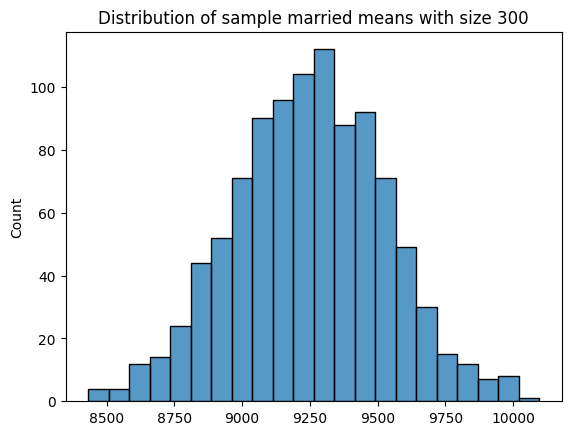

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=300).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=300).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with size 300')

Text(0.5, 1.0, 'Distribution of sample bachelor means with size 300')

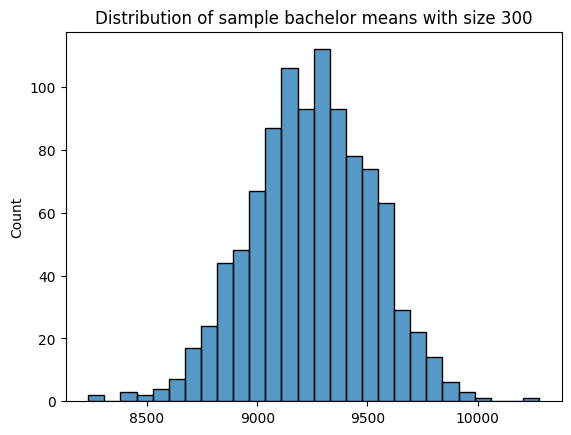

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with size 300')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 300 sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the 300 sample sized married data: [8697.679833333334,9802.692916666667] and the spread is 1105.0130833333333


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 300 sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the 300 sample sized bachelor data: [8701.616,9763.52975] and the spread is 1061.9137499999997


# Sample size with size 3000

Text(0.5, 1.0, 'Distribution of sample married means with size 3000')

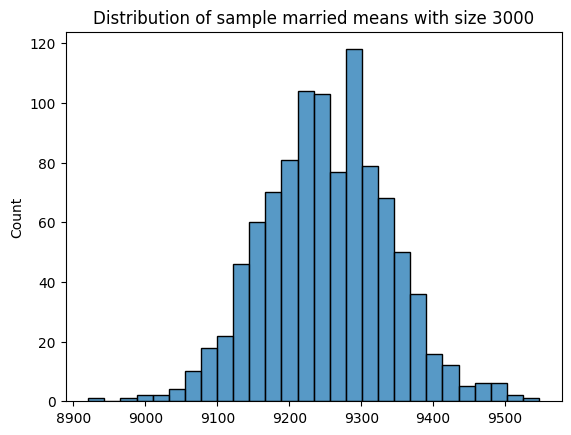

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=3000).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=3000).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with size 3000')

Text(0.5, 1.0, 'Distribution of sample bachelor means with size 3000')

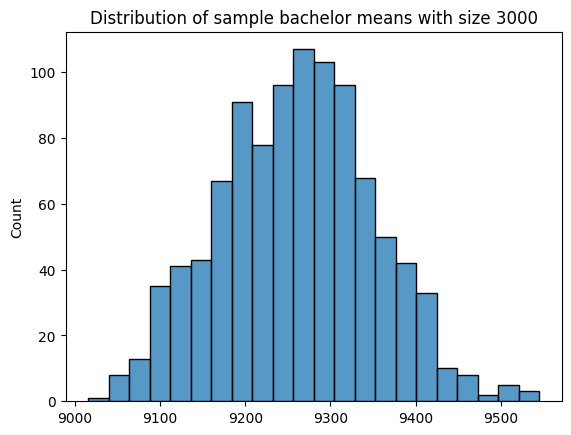

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with size 3000')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 3000 sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the 3000 sample sized married data: [9084.380633333334,9422.384133333333] and the spread is 338.0034999999989


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 3000 sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the 3000 sample sized bachelor data: [9090.699233333335,9428.188825000001] and the spread is 337.48959166666646


# Sample with size 30000

Text(0.5, 1.0, 'Distribution of sample married means with size 30000')

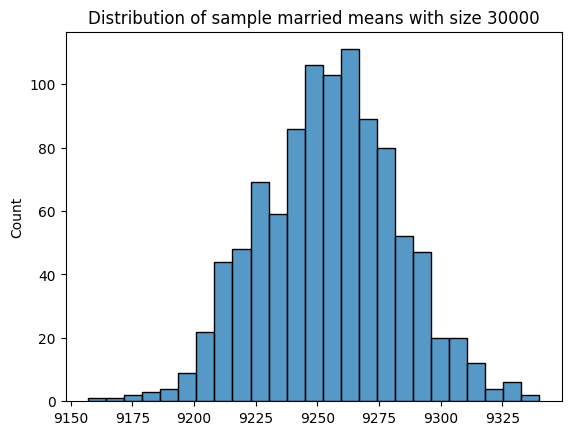

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=30000).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=30000).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with size 30000')

Text(0.5, 1.0, 'Distribution of sample bachelor means with size 30000')

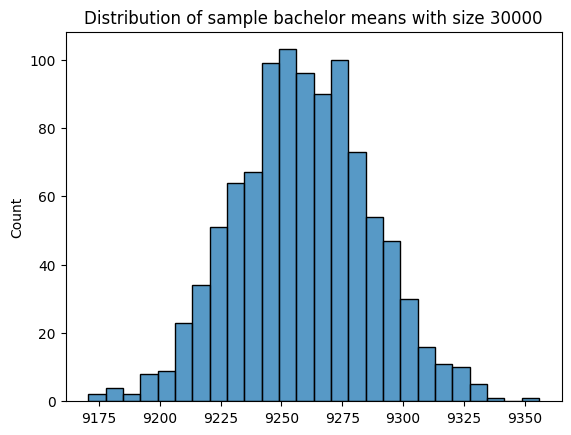

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with size 30000')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 30000 sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the 30000 sample sized married data: [9202.11658,9309.9371975] and the spread is 107.82061749999957


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 30000 sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the 30000 sample sized bachelor data: [9207.1579725,9313.35136] and the spread is 106.19338750000134


# Sample with whole data

Text(0.5, 1.0, 'Distribution of sample married means with all data')

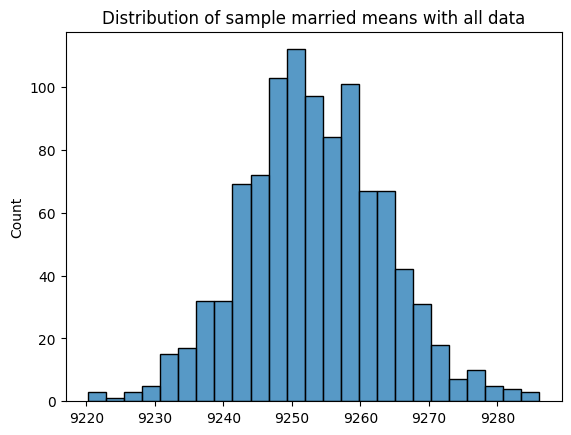

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=married_amt_purchase.shape[0]).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=bachelor_amt_purchase.shape[0]).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with all data')

Text(0.5, 1.0, 'Distribution of sample bachelor means with whole data')

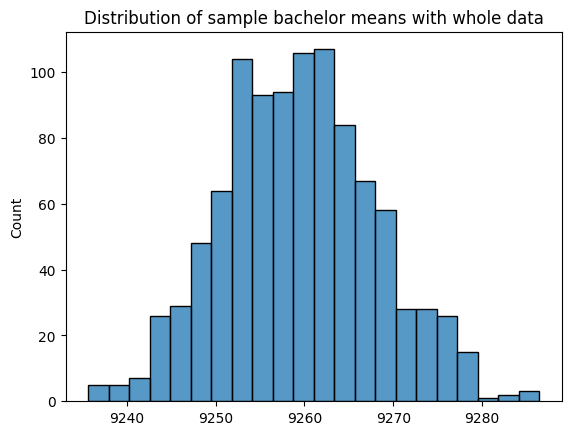

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with whole data')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)
print(f'Confidence interval for the whole sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the whole sample sized married data: [9233.32259526842,9274.299332999019] and the spread is 40.97673773059796


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)
print(f'Confidence interval for the whole sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the whole sample sized bachelor data: [9243.60314275508,9276.862897444345] and the spread is 33.25975468926481




*   So the CI of married and bachelors are almost overlapping with each other, hence the avg purchase amt between married and bachelor is same.



# Findings

*  The confidence interval computed using the entire dataset wider for married compared to bachelors. It's because the variation or the std. deviation in the purchase amount of married group is higher.


*   Width of the cofidence interval decreases as sample size increases, which is consistent with CLT.
*   Confidence Interval with higher sample sizes will lie within the confidence Interval with smaller sample sizes.

*   As sample size increases the sampling distribution of sample means become more normally disributed with lesser spread and higher precision.

# How does Age affect the amount spent?

H0: Age has no effect on the amount spent.


H1: At least one of the age group has different amount spent.

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
purchase_amt_child=df[df['Age']=='0-17']['Purchase_clipped']
purchase_amt_twenty=df[df['Age']=='18-25']['Purchase_clipped']
purchase_amt_thirty=df[df['Age']=='26-35']['Purchase_clipped']
purchase_amt_forty=df[df['Age']=='36-45']['Purchase_clipped']
purchase_amt_fifty=df[df['Age']=='46-50']['Purchase_clipped']
purchase_amt_fiftyplus=df[df['Age']=='51-55']['Purchase_clipped']
purchase_amt_old=df[df['Age']=='55+']['Purchase_clipped']

In [ ]:
from scipy.stats import f_oneway
f_oneway(purchase_amt_child,purchase_amt_twenty,purchase_amt_thirty,purchase_amt_forty,purchase_amt_fifty,purchase_amt_fiftyplus ,purchase_amt_old)

F_onewayResult(statistic=39.55938862241555, pvalue=2.111079894476655e-48)



*   So we can reject the null hypothesis, and tell that amount spent on purchase of different age groups is not same.




# Sample with size 300

In [ ]:
bootstrapped_sample_child_means=np.array([np.random.choice(purchase_amt_child,size=300).mean() for i in range (1000)])
bootstrapped_sample_twenty_means=np.array([np.random.choice(purchase_amt_twenty,size=300).mean()for i in range(1000)])
bootstrapped_sample_thirty_means=np.array([np.random.choice(purchase_amt_thirty,size=300).mean()for i in range(1000)])
bootstrapped_sample_forty_means=np.array([np.random.choice(purchase_amt_forty,size=300).mean()for i in range(1000)])
bootstrapped_sample_fifty_means=np.array([np.random.choice(purchase_amt_fifty,size=300).mean()for i in range(1000)])
bootstrapped_sample_fiftyplus_means=np.array([np.random.choice(purchase_amt_fiftyplus,size=300).mean()for i in range(1000)])
bootstrapped_sample_old_means=np.array([np.random.choice(purchase_amt_old,size=300).mean()for i in range(1000)])


# Confidence Intervals

In [ ]:
lower_bound_child=np.percentile(bootstrapped_sample_child_means,lower_percentile*100)
upper_bound_child=np.percentile(bootstrapped_sample_child_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 child data: [{lower_bound_child},{upper_bound_child}] and the spread is {upper_bound_child-lower_bound_child}' )

Confidence interval for the sample sized 300 child data: [8383.688083333333,9472.315583333333] and the spread is 1088.6275000000005


In [ ]:
lower_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,lower_percentile*100)
upper_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(18-25) data: [{lower_bound_twenty},{upper_bound_twenty}] and the spread is {upper_bound_twenty-lower_bound_twenty}' )

Confidence interval for the sample sized 300 & Age(18-25) data: [8579.551749999999,9722.327000000001] and the spread is 1142.7752500000024


In [ ]:
lower_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,lower_percentile*100)
upper_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(26-35) data: [{lower_bound_thirty},{upper_bound_thirty}] and the spread is {upper_bound_thirty-lower_bound_thirty}' )

Confidence interval for the sample sized 300 & Age(26-35) data: [8688.842916666666,9770.136499999999] and the spread is 1081.2935833333322


In [ ]:
lower_bound_forty=np.percentile(bootstrapped_sample_forty_means,lower_percentile*100)
upper_bound_forty=np.percentile(bootstrapped_sample_forty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(36-45) data: [{lower_bound_forty},{upper_bound_forty}] and the spread is {upper_bound_forty-lower_bound_forty}' )

Confidence interval for the sample sized 300 & Age(36-45) data: [8780.583333333334,9856.021166666667] and the spread is 1075.4378333333334


In [ ]:
lower_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,lower_percentile*100)
upper_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(46-50) data: [{lower_bound_fifty},{upper_bound_fifty}] and the spread is {upper_bound_fifty-lower_bound_fifty}' )

Confidence interval for the sample sized 300 & Age(46-50) data: [8693.465,9795.875999999998] and the spread is 1102.4109999999982


In [ ]:
lower_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,lower_percentile*100)
upper_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(50-55) data: [{lower_bound_fiftyplus},{upper_bound_fiftyplus}] and the spread is {upper_bound_fiftyplus-lower_bound_fiftyplus}' )

Confidence interval for the sample sized 300 & Age(50-55) data: [8974.456666666667,10075.918083333334] and the spread is 1101.461416666667


In [ ]:
lower_bound_old=np.percentile(bootstrapped_sample_old_means,lower_percentile*100)
upper_bound_old=np.percentile(bootstrapped_sample_old_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(55+) data: [{lower_bound_old},{upper_bound_old}] and the spread is {upper_bound_old-lower_bound_old}' )

Confidence interval for the sample sized 300 & Age(55+) data: [8801.870499999999,9864.068416666667] and the spread is 1062.1979166666679


# Sampling with size 3000

In [ ]:
bootstrapped_sample_child_means=np.array([np.random.choice(purchase_amt_child,size=3000).mean() for i in range (1000)])
bootstrapped_sample_twenty_means=np.array([np.random.choice(purchase_amt_twenty,size=3000).mean()for i in range(1000)])
bootstrapped_sample_thirty_means=np.array([np.random.choice(purchase_amt_thirty,size=3000).mean()for i in range(1000)])
bootstrapped_sample_forty_means=np.array([np.random.choice(purchase_amt_forty,size=3000).mean()for i in range(1000)])
bootstrapped_sample_fifty_means=np.array([np.random.choice(purchase_amt_fifty,size=3000).mean()for i in range(1000)])
bootstrapped_sample_fiftyplus_means=np.array([np.random.choice(purchase_amt_fiftyplus,size=3000).mean()for i in range(1000)])
bootstrapped_sample_old_means=np.array([np.random.choice(purchase_amt_old,size=3000).mean()for i in range(1000)])

# Confidence Intervals for each group

In [ ]:
lower_bound_child=np.percentile(bootstrapped_sample_child_means,lower_percentile*100)
upper_bound_child=np.percentile(bootstrapped_sample_child_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 child data: [{lower_bound_child},{upper_bound_child}] and the spread is {upper_bound_child-lower_bound_child}' )

Confidence interval for the sample sized 3000 child data: [8736.504541666667,9126.166866666666] and the spread is 389.6623249999993


In [ ]:
lower_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,lower_percentile*100)
upper_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(18-25) data: [{lower_bound_twenty},{upper_bound_twenty}] and the spread is {upper_bound_twenty-lower_bound_twenty}' )

Confidence interval for the sample sized 3000 & Age(18-25) data: [8995.923125,9355.233075] and the spread is 359.30995000000075


In [ ]:
lower_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,lower_percentile*100)
upper_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(26-35) data: [{lower_bound_thirty},{upper_bound_thirty}] and the spread is {upper_bound_thirty-lower_bound_thirty}' )

Confidence interval for the sample sized 3000 & Age(26-35) data: [9083.315191666667,9412.906483333334] and the spread is 329.59129166666753


In [ ]:
lower_bound_forty=np.percentile(bootstrapped_sample_forty_means,lower_percentile*100)
upper_bound_forty=np.percentile(bootstrapped_sample_forty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(36-45) data: [{lower_bound_forty},{upper_bound_forty}] and the spread is {upper_bound_forty-lower_bound_forty}' )

Confidence interval for the sample sized 3000 & Age(36-45) data: [9158.837016666666,9493.452358333332] and the spread is 334.6153416666657


In [ ]:
lower_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,lower_percentile*100)
upper_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(46-50) data: [{lower_bound_fifty},{upper_bound_fifty}] and the spread is {upper_bound_fifty-lower_bound_fifty}' )

Confidence interval for the sample sized 3000 & Age(46-50) data: [9027.528408333334,9370.036433333335] and the spread is 342.508025000001


In [ ]:
lower_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,lower_percentile*100)
upper_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(50-55) data: [{lower_bound_fiftyplus},{upper_bound_fiftyplus}] and the spread is {upper_bound_fiftyplus-lower_bound_fiftyplus}' )

Confidence interval for the sample sized 3000 & Age(50-55) data: [9321.838883333334,9698.637641666666] and the spread is 376.79875833333244


In [ ]:
lower_bound_old=np.percentile(bootstrapped_sample_old_means,lower_percentile*100)
upper_bound_old=np.percentile(bootstrapped_sample_old_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(55+) data: [{lower_bound_old},{upper_bound_old}] and the spread is {upper_bound_old-lower_bound_old}' )

Confidence interval for the sample sized 3000 & Age(55+) data: [9163.849450000002,9495.116066666666] and the spread is 331.26661666666405


# Sampling with size 30000

In [ ]:
bootstrapped_sample_child_means=np.array([np.random.choice(purchase_amt_child,size=30000).mean() for i in range (1000)])
bootstrapped_sample_twenty_means=np.array([np.random.choice(purchase_amt_twenty,size=30000).mean()for i in range(1000)])
bootstrapped_sample_thirty_means=np.array([np.random.choice(purchase_amt_thirty,size=30000).mean()for i in range(1000)])
bootstrapped_sample_forty_means=np.array([np.random.choice(purchase_amt_forty,size=30000).mean()for i in range(1000)])
bootstrapped_sample_fifty_means=np.array([np.random.choice(purchase_amt_fifty,size=30000).mean()for i in range(1000)])
bootstrapped_sample_fiftyplus_means=np.array([np.random.choice(purchase_amt_fiftyplus,size=30000).mean()for i in range(1000)])
bootstrapped_sample_old_means=np.array([np.random.choice(purchase_amt_old,size=30000).mean()for i in range(1000)])

# Confidence Intervals

In [ ]:
lower_bound_child=np.percentile(bootstrapped_sample_child_means,lower_percentile*100)
upper_bound_child=np.percentile(bootstrapped_sample_child_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 30000 child data: [{lower_bound_child},{upper_bound_child}] and the spread is {upper_bound_child-lower_bound_child}' )

Confidence interval for the sample sized 30000 child data: [8888.259091666667,8993.823831666667] and the spread is 105.5647399999998


In [ ]:
lower_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,lower_percentile*100)
upper_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 30000 & Age(18-25) data: [{lower_bound_twenty},{upper_bound_twenty}] and the spread is {upper_bound_twenty-lower_bound_twenty}' )

Confidence interval for the sample sized 30000 & Age(18-25) data: [9110.567855,9223.867373333334] and the spread is 113.29951833333507


In [ ]:
lower_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,lower_percentile*100)
upper_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 30000 & Age(26-35) data: [{lower_bound_thirty},{upper_bound_thirty}] and the spread is {upper_bound_thirty-lower_bound_thirty}' )

Confidence interval for the sample sized 30000 & Age(26-35) data: [9186.390663333334,9301.206734166666] and the spread is 114.81607083333256


In [ ]:
lower_bound_forty=np.percentile(bootstrapped_sample_forty_means,lower_percentile*100)
upper_bound_forty=np.percentile(bootstrapped_sample_forty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 30000 & Age(36-45) data: [{lower_bound_forty},{upper_bound_forty}] and the spread is {upper_bound_forty-lower_bound_forty}' )

Confidence interval for the sample sized 30000 & Age(36-45) data: [9268.941510833334,9377.674044166666] and the spread is 108.73253333333196


In [ ]:
lower_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,lower_percentile*100)
upper_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 30000 & Age(46-50) data: [{lower_bound_fifty},{upper_bound_fifty}] and the spread is {upper_bound_fifty-lower_bound_fifty}' )

Confidence interval for the sample sized 30000 & Age(46-50) data: [9151.609855833334,9255.98582] and the spread is 104.37596416666565


In [ ]:
lower_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,lower_percentile*100)
upper_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 30000 & Age(50-55) data: [{lower_bound_fiftyplus},{upper_bound_fiftyplus}] and the spread is {upper_bound_fiftyplus-lower_bound_fiftyplus}' )

Confidence interval for the sample sized 30000 & Age(50-55) data: [9460.630874166667,9570.622021666666] and the spread is 109.99114749999899


In [ ]:
lower_bound_old=np.percentile(bootstrapped_sample_old_means,lower_percentile*100)
upper_bound_old=np.percentile(bootstrapped_sample_old_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 3000 & Age(55+) data: [{lower_bound_old},{upper_bound_old}] and the spread is {upper_bound_old-lower_bound_old}' )

Confidence interval for the sample sized 3000 & Age(55+) data: [9274.725094166666,9383.81201] and the spread is 109.08691583333348


# Sampling with whole data

In [ ]:
bootstrapped_sample_child_means=np.array([np.random.choice(purchase_amt_child,size=purchase_amt_child.shape[0]).mean() for i in range (1000)])
bootstrapped_sample_twenty_means=np.array([np.random.choice(purchase_amt_twenty,size=purchase_amt_twenty.shape[0]).mean()for i in range(1000)])
bootstrapped_sample_thirty_means=np.array([np.random.choice(purchase_amt_thirty,size=purchase_amt_thirty.shape[0]).mean()for i in range(1000)])
bootstrapped_sample_forty_means=np.array([np.random.choice(purchase_amt_forty,size=purchase_amt_forty.shape[0]).mean()for i in range(1000)])
bootstrapped_sample_fifty_means=np.array([np.random.choice(purchase_amt_fifty,size=purchase_amt_fifty.shape[0]).mean()for i in range(1000)])
bootstrapped_sample_fiftyplus_means=np.array([np.random.choice(purchase_amt_fiftyplus,size=purchase_amt_fiftyplus.shape[0]).mean()for i in range(1000)])
bootstrapped_sample_old_means=np.array([np.random.choice(purchase_amt_old,size=purchase_amt_old.shape[0]).mean()for i in range(1000)])

# Confidence Intervals

In [ ]:

lower_bound_child=np.percentile(bootstrapped_sample_child_means,lower_percentile*100)
upper_bound_child=np.percentile(bootstrapped_sample_child_means,upper_percentile*100)
print(f'Confidence interval for the whole sample sized child data: [{lower_bound_child},{upper_bound_child}] and the spread is {upper_bound_child-lower_bound_child}' )

Confidence interval for the whole sample sized child data: [8861.26029664945,9014.161422328169] and the spread is 152.90112567871802


In [ ]:
lower_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,lower_percentile*100)
upper_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,upper_percentile*100)
print(f'Confidence interval for the full sample sized  & Age(18-25) data: [{lower_bound_twenty},{upper_bound_twenty}] and the spread is {upper_bound_twenty-lower_bound_twenty}' )

Confidence interval for the full sample sized  & Age(18-25) data: [9137.688568884207,9197.427801776039] and the spread is 59.739232891832216


In [ ]:
lower_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,lower_percentile*100)
upper_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,upper_percentile*100)
print(f'Confidence interval for the full sample sized  & Age(26-35) data: [{lower_bound_thirty},{upper_bound_thirty}] and the spread is {upper_bound_thirty-lower_bound_thirty}' )

Confidence interval for the full sample sized  & Age(26-35) data: [9224.416017000094,9264.591481736168] and the spread is 40.17546473607399


In [ ]:
lower_bound_forty=np.percentile(bootstrapped_sample_forty_means,lower_percentile*100)
upper_bound_forty=np.percentile(bootstrapped_sample_forty_means,upper_percentile*100)
print(f'Confidence interval for the full sample sized  & Age(36-45) data: [{lower_bound_forty},{upper_bound_forty}] and the spread is {upper_bound_forty-lower_bound_forty}' )

Confidence interval for the full sample sized  & Age(36-45) data: [9295.915606110188,9350.708988255934] and the spread is 54.793382145746364


In [ ]:
lower_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,lower_percentile*100)
upper_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,upper_percentile*100)
print(f'Confidence interval for the full sample sized  & Age(46-50) data: [{lower_bound_fifty},{upper_bound_fifty}] and the spread is {upper_bound_fifty-lower_bound_fifty}' )

Confidence interval for the full sample sized  & Age(46-50) data: [9160.540261701057,9247.789694973852] and the spread is 87.2494332727947


In [ ]:
lower_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,lower_percentile*100)
upper_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,upper_percentile*100)
print(f'Confidence interval for the full sample sized  & Age(50-55) data: [{lower_bound_fiftyplus},{upper_bound_fiftyplus}] and the spread is {upper_bound_fiftyplus-lower_bound_fiftyplus}' )

Confidence interval for the full sample sized  & Age(50-55) data: [9463.91167696943,9562.628012259422] and the spread is 98.71633528999155


In [ ]:
lower_bound_old=np.percentile(bootstrapped_sample_old_means,lower_percentile*100)
upper_bound_old=np.percentile(bootstrapped_sample_old_means,upper_percentile*100)
print(f'Confidence interval for the full sample sized  & Age(55+) data: [{lower_bound_old},{upper_bound_old}] and the spread is {upper_bound_old-lower_bound_old}' )

Confidence interval for the full sample sized  & Age(55+) data: [9259.675711495536,9392.822392345612] and the spread is 133.14668085007543




*   Confidence intervals for the average amount spent by different age groups (computed using all the data) do not overlap with each other. This is confirmed by ANOVA method using F test.



# Findings

*  The confidence interval computed using the entire dataset wider for Child and 55+ aged people compared to other age groups. It's because the variation or the std. deviation in the purchase amount of child and older people is higher.


*   Width of the cofidence interval decreases as sample size increases, which is consistent with CLT.
*   Confidence Interval with higher sample sizes will lie within the confidence Interval with smaller sample sizes.

*   As sample size increases the sampling distribution of sample means become more normally disributed with lesser spread and higher precision.

# Report & Recommendations :

# a. Average Amount Spent by Males and Females:

The confidence intervals for the average amount spent by males and females, computed using all the available data, do not overlap. This indicates that the average amount spent by males is significantly different from that of females. We confirmed this using a Z-test, which revealed that the difference in average spending between males and females is statistically significant.

# How Walmart can leverage this conclusion:
Walmart can use this information to tailor their marketing strategies and promotions to better target each gender. For instance, they can create gender-specific advertising campaigns or offer gender-specific discounts and promotions to attract more customers. Additionally, understanding the spending patterns of different genders can help Walmart optimize their product offerings and inventory management to cater to the preferences of their diverse customer base.

#b. Average Amount Spent by Married and Unmarried Individuals:

The confidence intervals for the average amount spent by married and unmarried individuals, computed using all the available data, overlap significantly. This suggests that there is no statistically significant difference in the average amount spent between married and unmarried individuals. Our analysis, using a Z-test, confirms this finding.

# How Walmart can leverage this conclusion:
Walmart can use this insight to design marketing campaigns and promotions that appeal to both married and unmarried individuals equally. By understanding that there is no significant difference in spending behavior between these two groups, Walmart can focus on creating inclusive marketing strategies that resonate with a broader audience.

# c. Average Amount Spent by Different Age Groups:

The confidence intervals for the average amount spent by different age groups, computed using all the available data, do not overlap. This indicates that there are statistically significant differences in the average amount spent between different age groups. Our analysis, conducted using an ANOVA test (F-test), confirmed this observation.

# How Walmart can leverage this conclusion:
Walmart can use this information to tailor their product offerings, marketing messages, and store layouts to better target each age group's preferences and spending habits. For example, they can introduce age-specific promotions, loyalty programs, or product bundles to attract customers from different age demographics. Understanding the unique spending patterns of different age groups can help Walmart optimize their revenue generation strategies and enhance customer satisfaction.